In [1]:
from climlab.solar.insolation import daily_insolation
import numpy as np
import matplotlib.pyplot as plt
Lat=np.linspace(-90,90,18)
x=np.linspace(0,60*60*24*365,101)
sol=daily_insolation(Lat,x/60/60/24)#%365)
#int(x/xconv)%365

[  0.     3.65   7.3   10.95  14.6   18.25  21.9   25.55  29.2   32.85
  36.5   40.15  43.8   47.45  51.1   54.75  58.4   62.05  65.7   69.35
  73.    76.65  80.3   83.95  87.6   91.25  94.9   98.55 102.2  105.85
 109.5  113.15 116.8  120.45 124.1  127.75 131.4  135.05 138.7  142.35
 146.   149.65 153.3  156.95 160.6  164.25 167.9  171.55 175.2  178.85
 182.5  186.15 189.8  193.45 197.1  200.75 204.4  208.05 211.7  215.35
 219.   222.65 226.3  229.95 233.6  237.25 240.9  244.55 248.2  251.85
 255.5  259.15 262.8  266.45 270.1  273.75 277.4  281.05 284.7  288.35
 292.   295.65 299.3  302.95 306.6  310.25 313.9  317.55 321.2  324.85
 328.5  332.15 335.8  339.45 343.1  346.75 350.4  354.05 357.7  361.35
   0.  ]


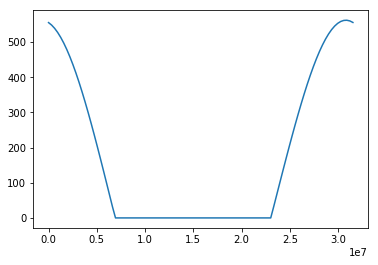

In [2]:
print(x/(60*60*24)%365)
plt.plot(x,sol[0])